In [5]:
import cv2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
from sklearn.model_selection import train_test_split

### Preprocess images

In [2]:
# Define a mapping from emotion names to numeric labels
emotion_map = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Preprocess image function
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image at path {image_path} could not be loaded.")
        image = cv2.resize(image, (48, 48))
        image = image.astype('float32') / 255
        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Preprocess images in directory
def preprocess_data(data_dir):
    images = []
    labels = []
    try:
        for label_folder in os.listdir(data_dir):
            folder_path = os.path.join(data_dir, label_folder)
            if not os.path.isdir(folder_path):
                print(f"Skipping non-directory {folder_path}")
                continue
            for img_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, img_file)
                image = preprocess_image(image_path)
                if image is not None:
                    if label_folder in emotion_map:
                        images.append(image)
                        labels.append(emotion_map[label_folder])
                    else:
                        print(f"Unknown label folder: {label_folder}")
    except Exception as e:
        print(f"Error processing data in {data_dir}: {e}")
    return np.array(images), np.array(labels)

# Preprocess training and testing data
train_images, train_labels = preprocess_data('../data/raw/train')
test_images, test_labels = preprocess_data('../data/raw/test')

# Print shapes for verification
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (28709, 48, 48)
Train labels shape: (28709,)
Test images shape: (7178, 48, 48)
Test labels shape: (7178,)


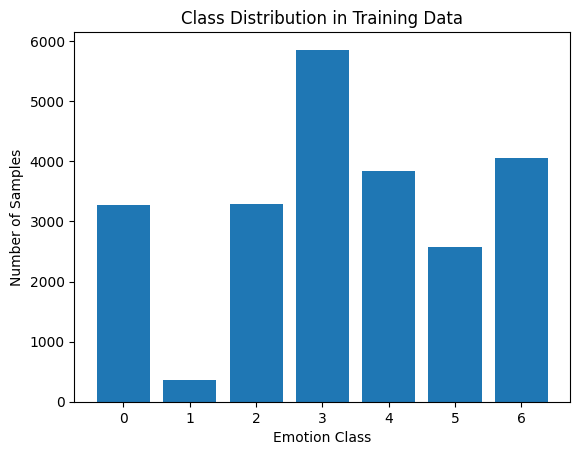

In [7]:
# Count the number of samples per class
class_counts = Counter(train_labels)

# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
#plt.savefig('../plots/class_distribution.png')
plt.show()

In [4]:
# Split train data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images,
                                                                      train_labels,
                                                                      test_size=0.1,
                                                                      random_state=42)

# Save the processed data
np.save('../data/processed/train_images.npy', train_images)
np.save('../data/processed/train_labels.npy', train_labels)
np.save('../data/processed/val_images.npy', val_images)
np.save('../data/processed/val_labels.npy', val_labels)
np.save('../data/processed/test_images.npy', test_images)
np.save('../data/processed/test_labels.npy', test_labels)